<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/CVLC_06_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')

In [3]:
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/0
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/1
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/2
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/3
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/4
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/5
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/6
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/7
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/8
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/9
# !mkdir /content/drive/MyDrive/DACON_CVLC/data/images_test

In [4]:
# import cv2

# for idx in range(len(train)) :
#     img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
#     digit = train.loc[idx, 'digit']
#     cv2.imwrite(f'/content/drive/MyDrive/DACON_CVLC/data/images_train/{digit}/{train["id"][idx]}.png', img)

# for idx in range(len(test)) :
#     img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
#     cv2.imwrite(f'/content/drive/MyDrive/DACON_CVLC/data/images_test/{test["id"][idx]}.png', img)

In [5]:
import tensorflow as tf
model =  tf.keras.applications.ResNet50(weights=None, include_top=True, input_shape=(224, 224, 1), classes=10)

In [6]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

train_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='validation')

Found 1642 images belonging to 10 classes.
Found 406 images belonging to 10 classes.


In [8]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_ResNet50.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [9]:
model.fit_generator(train_generator, epochs=500, validation_data=val_generator, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
52/52 [==============================] - 513s 10s/step - loss: 3.1435 - accuracy: 0.2010 - val_loss: 16.4930 - val_accuracy: 0.0961

Epoch 00001: val_accuracy improved from -inf to 0.09606, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_ResNet50.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
52/52 [==============================] - 11s 204ms/step - loss: 1.7496 - accuracy: 0.4379 - val_loss: 5.5127 - val_accuracy: 0.0936

Epoch 00002: val_accuracy did not improve from 0.09606
Epoch 3/500
52/52 [==============================] - 11s 205ms/step - loss: 1.2450 - accuracy: 0.5895 - val_loss: 5.1030 - val_accuracy: 0.0640

Epoch 00003: val_accuracy did not improve from 0.09606
Epoch 4/500
52/52 [==============================] - 11s 205ms/step - loss: 1.1781 - accuracy: 0.6181 - val_loss: 4.9117 - val_accuracy: 0.1010

Epoch 00004: val_accuracy improved from 0.09606 to 0.10099, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_ResNet50.h5
Epoch 5/500
52/52 [==============================] - 11s 206ms/step - loss: 1.1101 - accuracy: 0.6510 - val_loss: 5.1380 - val_accuracy: 0.1158

Epoch 00005: val_accuracy improved from 0.10099 to 0.11576, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_ResNet50.h5
Epoch 6/500
52/52 [=========

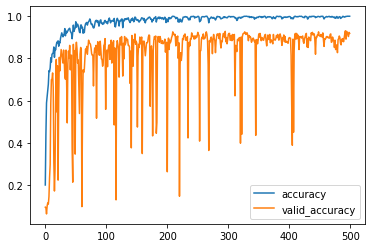

In [10]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"], label='accuracy')
plt.plot(model.history.history["val_accuracy"], label='valid_accuracy')

plt.legend()
plt.show()

In [11]:
model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_ResNet50.h5', compile=False)

In [12]:
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_test/none
!mv /content/drive/MyDrive/DACON_CVLC/data/images_test/*.png /content/drive/MyDrive/DACON_CVLC/data/images_test/none

mkdir: cannot create directory ‘/content/drive/MyDrive/DACON_CVLC/data/images_test/none’: Input/output error
mv: cannot stat '/content/drive/MyDrive/DACON_CVLC/data/images_test/none/10000.png': Input/output error


In [13]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_test', target_size=(224,224), color_mode='grayscale', class_mode='categorical', shuffle=False)

Found 20480 images belonging to 1 classes.


In [20]:
test_generator.reset()
predict = model.predict_generator(test_generator).argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [22]:
from google.colab import files
submission = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')
submission['digit'] = predict
submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/submission.csv', index=False)
files.download('/content/drive/MyDrive/DACON_CVLC/Submission/submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import numpy as np
sub['digit'] = np.argmax(model.predict(test_generator), axis=1)
sub.head()
sub.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/CVLC_06_ResNet50.csv', index=False)

In [19]:
from google.colab import files
files.download('/content/drive/MyDrive/DACON_CVLC/Checkpoint/CVLC_06_ResNet50.h5')
files.download('/content/drive/MyDrive/DACON_CVLC/Submission/CVLC_06_ResNet50.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>